In [526]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *


# Get Data 
---

In [527]:
# merge_ohlc_closing_prices('binance_data/top_100_tickers/2024/1m')

 * ## Closing Price Data


In [528]:

#prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/From_Paper/2023/1m/merged_From_Paper_closing_prices_OCT_NOV.csv", index_col=0, parse_dates=True)

#BTC and WBTC
#-------------------------------------------
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/Wrapped BTC/2024/1m/merged_closing_prices.csv", index_col=0, parse_dates=True)


#SOL and BNSOL
#-------------------------------------------
#prices = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#ETH and WBTC
#-------------------------------------------
#prices = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#Top 100
#-------------------------------------------
prices = pd.read_csv('binance_data/top_100_tickers/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

In [529]:
prices = prices[['XRP/USDT_2024_1m', 'ADA/USDT_2024_1m']]

#prices = prices[['DOT/USDT_2024_1m', 'XTZ/USDT_2024_1m']]

#BCH/USDT_2024_1m & DOGE/USDT_2024_1m
#-------------------------------------------
#prices = prices[['BCH/USDT_2024_1m', 'DOGE/USDT_2024_1m']]

#GALA/USDT_2024_1m & GRT/USDT_2024_1m,0.0056584346126191745,-4.071777010162084
#-------------------------------------------
#prices = prices[['GALA/USDT_2024_1m', 'GRT/USDT_2024_1m']]

In [530]:
prices

,XRP/USDT_2024_1m,ADA/USDT_2024_1m
timestamp,,
2024-01-01 00:00:00,0.6155,0.5940
2024-01-01 00:01:00,0.6159,0.5947
2024-01-01 00:02:00,0.6163,0.5948
2024-01-01 00:03:00,0.6165,0.5960
2024-01-01 00:04:00,0.6168,0.5971
...,...,...
2024-06-30 23:55:00,0.4763,0.3926
2024-06-30 23:56:00,0.4762,0.3924
2024-06-30 23:57:00,0.4763,0.3924


In [531]:
# count_unchanged_rows = (prices.diff().eq(0).all(axis=1)).sum()
# print("Number of fully unchanged rows:", count_unchanged_rows)

In [532]:
# prices = prices[prices.diff().ne(0).all(axis=1)]

In [533]:
# count_unchanged_rows = (prices.diff().eq(0).all(axis=1)).sum()
# print("Number of fully unchanged rows:", count_unchanged_rows)

 * ## Order book data


In [534]:
# #BTC and WBTC
# #-------------------------------------------
#prices = pd.read_csv('order_book_data/merged_data/1min/btc_wbtc_combined_1m.csv', index_col=0, parse_dates=True)

#ETH and WBETH
#prices = pd.read_csv('order_book_data/merged_data/1min/eth_wbeth_combined_1m.csv', index_col=0, parse_dates=True)


In [535]:
# Only show mid prices
#prices = prices[['btc_mid_price', 'wbtc_mid_price']]

#prices = prices[['eth_mid_price','wbeth_mid_price']]

In [536]:
# #Fliter prices to end in May
# prices = prices.loc['2024-01-01':'2024-05-31']

In [537]:
# prices_ETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/ETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_WBETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/WBETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)   
# prices_WBTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/WBTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_BTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/BTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)

In [538]:
#get prices for dates greater than or equal to 2024-01-01 16:30:00	

#prices = prices.loc[prices.index >= "2024-01-01 16:30:00"]

# Trading simulation
---

* ## In-Sample Testing

In [539]:
# #XVS/USDT_2024_30m & QI/USDT_2024_30m


# crypto_1 = prices.columns[0]
# crypto_2 = prices.columns[1]

# cointegrated_pairs = [(crypto_1,
#   crypto_2,
#   0.731393,
#   0.8501886494196308,
#   0.22)]

In [540]:
#Params:
window_size = 1440
entry_threshold= 3 #3 was prev
exit_threshold= 0
stop_loss_threshold = 100

In [541]:
prices.columns

Index(['XRP/USDT_2024_1m', 'ADA/USDT_2024_1m'], dtype='object')

## For Closing Price Data 
---

In [542]:
sym1, sym2 = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")
S1 = prices[sym1]
S2 = prices[sym2]

# Compute the spread series and beta_series 
spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

#                                   FOR CLOSING PRICE DATA
#------------------------------------------------------------------------------------------
# Generate trading signals (positions) based on the spread's z-score
positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)



Testing strategy on pair: XRP/USDT_2024_1m and ADA/USDT_2024_1m ...
Total trades closed: 151 (Wins=151, Losses=0)
Win rate: 1.00


## For Order Book Data 
---

In [543]:
prices.columns

Index(['XRP/USDT_2024_1m', 'ADA/USDT_2024_1m'], dtype='object')

In [544]:
# sym1, S1_ask_price, S1_bid_price,S1_ask_amount,S1_bid_amount,sym2,S2_ask_price, S2_bid_price,S2_ask_amount,S2_bid_amount  = prices.columns
# print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")

# #Gather relevant columns from order book data
# #-------------------------------------------
# S1_mid_price = prices[sym1]
# S2_mid_price = prices[sym2]
# #-------------------------------------------
# S1_ask_price = prices[S1_ask_price]
# S1_ask_amount = prices[S1_ask_amount]
# S1_bid_price = prices[S1_bid_price]
# S1_bid_amount = prices[S1_bid_amount]
# #-------------------------------------------
# S2_ask_price = prices[S2_ask_price]
# S2_ask_amount = prices[S2_ask_amount]
# S2_bid_price = prices[S2_bid_price]
# S2_bid_amount = prices[S2_bid_amount]
# #-------------------------------------------

# # Compute the spread series and beta_series 
# spread_series, beta_series, alpha_series = compute_spread_series(S1_mid_price, S2_mid_price, window_size)
# #print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# # Compute rolling z-score using the provided helper function.
# zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

# #                                   FOR CLOSING PRICE DATA
# #------------------------------------------------------------------------------------------
# # Generate trading signals (positions) based on the spread's z-score
# #positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)

# #                                   FOR ORDER BOOK DATA
# #------------------------------------------------------------------------------------------
# positions, trade_entries, trade_exits = backtest_pair_rolling_order_book(spread_series,
#                                                                          S1_mid_price,
#                                                                          S2_mid_price,
#                                                                          S1_ask_price,
#                                                                          S1_ask_amount,
#                                                                          S1_bid_price,
#                                                                          S1_bid_amount,
#                                                                          S2_ask_price,
#                                                                          S2_ask_amount,
#                                                                          S2_bid_price,
#                                                                          S2_bid_amount,
#                                                                          zscore_series, 
#                                                                          entry_threshold, 
#                                                                          exit_threshold, 
#                                                                          stop_loss_threshold)



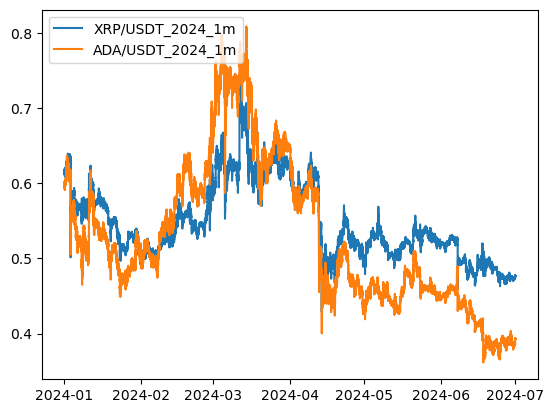

In [545]:
#Plot the closing prices of the merged data using different y axis

crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

plt.plot(prices[crypto_1], label=crypto_1)
plt.plot(prices[crypto_2], label=crypto_2)
plt.legend(loc='upper left')
plt.show()






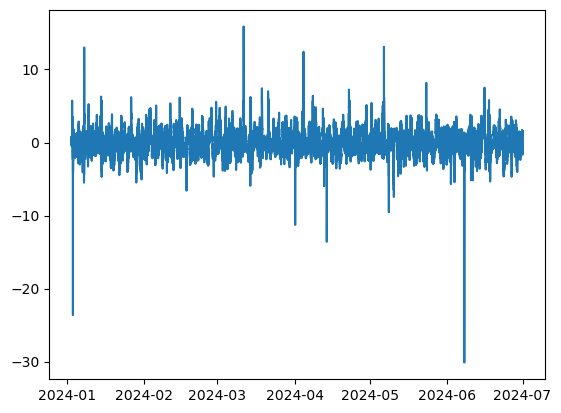

In [546]:
plt.plot(zscore_series)

In [547]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost #Binance level 5 Maker Cost

trade_profits, cumulative_profit_series, entry_times, exit_times = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series, tx_cost)

Trade Num: 0
-----------------------------------------------
Trade type: -1, Entry time: 2024-01-03 04:49:00, Exit time: 2024-01-03 11:07:00
Net Trade profit (includes fees): 32.85347954816128
Beta at entry (Not the absolute value): 0.3326158939606483
Notional S1: 7504.037769112258, Notional S2: 2495.9622308877424, Shares S1 : 11850.975630309946, Shares S2: 4089.730019478523
Percentage change S1: -0.38%, Percentage change S2: 0.38%
Trade Num: 1
-----------------------------------------------
Trade type: 1, Entry time: 2024-01-03 11:55:00, Exit time: 2024-01-03 13:48:00
Net Trade profit (includes fees): -434.765501758836
Beta at entry (Not the absolute value): 0.3219468191743985
Notional S1: 7564.600825807308, Notional S2: 2435.3991741926907, Shares S1 : 12308.169257740494, Shares S2: 4093.107855786035
Percentage change S1: -7.96%, Percentage change S2: -7.06%
Trade Num: 2
-----------------------------------------------
Trade type: 1, Entry time: 2024-01-06 06:56:00, Exit time: 2024-01-

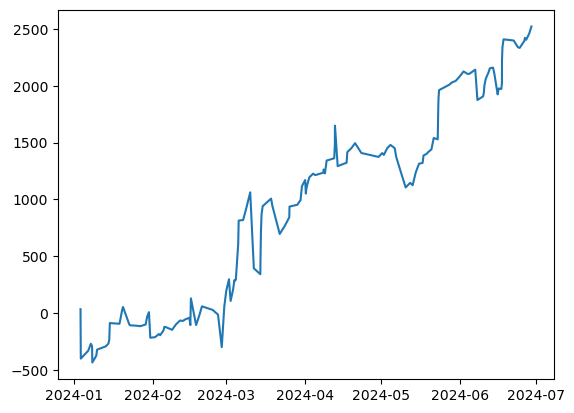

In [548]:
plt.plot(cumulative_profit_series)

In [549]:
exit_times

[Timestamp('2024-01-03 11:07:00'),
 Timestamp('2024-01-03 13:48:00'),
 Timestamp('2024-01-06 12:21:00'),
 Timestamp('2024-01-07 12:41:00'),
 Timestamp('2024-01-08 00:21:00'),
 Timestamp('2024-01-08 02:52:00'),
 Timestamp('2024-01-09 16:31:00'),
 Timestamp('2024-01-09 23:34:00'),
 Timestamp('2024-01-13 10:05:00'),
 Timestamp('2024-01-14 11:45:00'),
 Timestamp('2024-01-14 19:31:00'),
 Timestamp('2024-01-14 22:31:00'),
 Timestamp('2024-01-15 00:35:00'),
 Timestamp('2024-01-18 19:46:00'),
 Timestamp('2024-01-19 06:37:00'),
 Timestamp('2024-01-19 20:57:00'),
 Timestamp('2024-01-20 05:22:00'),
 Timestamp('2024-01-22 16:55:00'),
 Timestamp('2024-01-23 01:20:00'),
 Timestamp('2024-01-25 16:43:00'),
 Timestamp('2024-01-27 00:45:00'),
 Timestamp('2024-01-29 03:31:00'),
 Timestamp('2024-01-29 18:30:00'),
 Timestamp('2024-01-30 10:56:00'),
 Timestamp('2024-01-30 23:38:00'),
 Timestamp('2024-02-01 21:07:00'),
 Timestamp('2024-02-03 09:03:00'),
 Timestamp('2024-02-03 21:01:00'),
 Timestamp('2024-02-

In [550]:
#Measure delta netrality deviation
#-------------------------------------------

#Epsilon = 0.0001 #A small number to avoid division by zero

#Get entry betas for each trade
entry_betas = beta_series[entry_times]

#For each trade, measure the actual ratios as the change in S1 over the change in S2

trade_ranges = [(entry, exit) for entry, exit in zip(entry_times, exit_times)]

#Get the prices of S1 and S2 over the trade range
S1_trade_ranges_prices = [S1[entry:exit] for entry, exit in trade_ranges]
S2_trade_ranges_prices = [S2[entry:exit] for entry, exit in trade_ranges]

#Calculate the change in S1 and S2 over their trade range prices
S1_trade_ranges_changes = [S1_prices.diff()  for S1_prices in S1_trade_ranges_prices]  #Add Epsilon to avoid division by zero when calculating the ratio
S2_trade_ranges_changes = [S2_prices.diff() for S2_prices in S2_trade_ranges_prices] #Add Epsilon to avoid division by zero when calculating the ratio


#Drop nans
S1_trade_ranges_changes = [changes.dropna() for changes in S1_trade_ranges_changes]
S2_trade_ranges_changes = [changes.dropna() for changes in S2_trade_ranges_changes]


# #Remove differences of 0
# S1_trade_ranges_changes = [changes[changes != 0] for changes in S1_trade_ranges_changes]
# S2_trade_ranges_changes = [changes[changes != 0] for changes in S2_trade_ranges_changes]

#Count number of 0 values in S1 and S2 changes
count_0_S1 = [np.count_nonzero(changes == 0) for changes in S1_trade_ranges_changes]
count_0_S2 = [np.count_nonzero(changes == 0) for changes in S2_trade_ranges_changes]
print("Number of 0 values in S1 changes:", count_0_S1)
print("Number of 0 values in S2 changes:", count_0_S2)

#Check if time series are equal length for each trade
for i, (S1_changes, S2_changes) in enumerate(zip(S1_trade_ranges_changes, S2_trade_ranges_changes)):
    if len(S1_changes) != len(S2_changes):
        print(f"Trade {i} has different lengths: S1 changes: {len(S1_changes)}, S2 changes: {len(S2_changes)}")



#Calculate the ratio of S1/S2 for each trade
trade_ratios = [S1_changes / S2_changes for S1_changes, S2_changes in zip(S1_trade_ranges_changes, S2_trade_ranges_changes)]

#Remove nans and infs
#-----------------------------------
trade_ratios = [ratios.dropna() for ratios in trade_ratios]
trade_ratios = [ratios[np.isfinite(ratios)] for ratios in trade_ratios]


count_inf = [np.count_nonzero(np.isinf(ratio)) for ratio in trade_ratios]
count_nan = [np.count_nonzero(np.isnan(ratio)) for ratio in trade_ratios]
print("Number of nan values in trade ratios:", count_nan)
print("Number of inf values in trade ratios:", count_inf)


#Calculate the beta mismatch for each trade
beta_mismatch = [abs(entry_beta - trade_ratio) for entry_beta, trade_ratio in zip(entry_betas, trade_ratios)]


#Calculate the average beta mismatch for each trade
avg_beta_mismatch = [np.mean(mismatch) for mismatch in beta_mismatch]

#Maximum beta mismatch
max_beta_mismatch = [np.max(mismatch) for mismatch,entry_beta in zip(beta_mismatch,entry_betas)]



Number of 0 values in S1 changes: [41, 1, 50, 30, 6, 5, 18, 21, 96, 30, 5, 3, 9, 28, 78, 36, 70, 112, 39, 87, 54, 85, 7, 62, 65, 40, 158, 67, 63, 48, 47, 99, 25, 84, 10, 80, 22, 41, 11, 47, 8, 30, 147, 39, 138, 35, 14, 4, 53, 38, 3, 6, 14, 37, 1, 44, 18, 14, 5, 8, 1, 4, 4, 10, 17, 42, 9, 42, 63, 10, 8, 110, 48, 37, 9, 12, 23, 45, 26, 38, 79, 35, 13, 42, 0, 47, 4, 1, 0, 0, 153, 4, 10, 50, 72, 145, 8, 48, 19, 33, 91, 38, 39, 14, 50, 26, 5, 36, 84, 20, 29, 156, 20, 139, 15, 152, 0, 7, 15, 164, 56, 42, 89, 42, 175, 81, 73, 76, 38, 52, 22, 56, 9, 21, 72, 15, 326, 56, 6, 5, 1, 21, 28, 185, 181, 65, 2, 34, 118, 26, 284]
Number of 0 values in S2 changes: [34, 0, 18, 13, 7, 9, 12, 14, 37, 21, 8, 2, 3, 9, 25, 15, 34, 75, 34, 59, 43, 48, 3, 28, 55, 32, 84, 98, 39, 31, 49, 39, 8, 59, 3, 44, 35, 16, 10, 13, 8, 16, 69, 19, 118, 22, 19, 5, 31, 24, 1, 0, 17, 18, 0, 22, 13, 7, 11, 3, 3, 1, 0, 5, 7, 27, 17, 58, 52, 11, 9, 100, 29, 34, 9, 11, 18, 28, 19, 17, 60, 20, 19, 57, 3, 31, 3, 0, 0, 2, 106, 4, 15,

In [551]:
len(max_beta_mismatch)

151

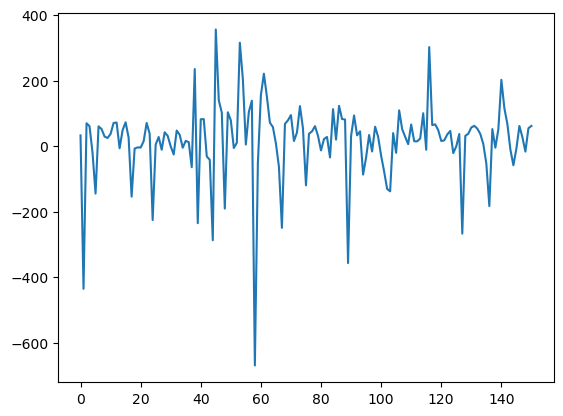

In [552]:
plt.plot(trade_profits)

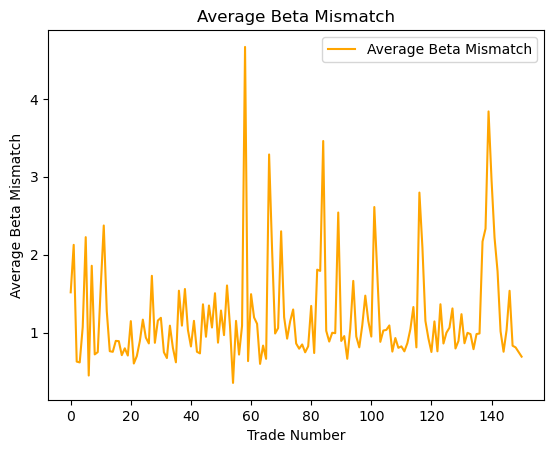

In [553]:
#Plot average beta mismatch
plt.plot(avg_beta_mismatch, color = 'orange', label='Average Beta Mismatch')
plt.title('Average Beta Mismatch')
plt.xlabel('Trade Number')
plt.ylabel('Average Beta Mismatch')
plt.legend()
plt.show()

In [554]:
#Compute leg assymetry for each trade 
#-------------------------------------------


#Change in S1 and S2 from entry to exit (taking into account the beta) 
S1_abs_price_change_trade_ranges = [abs(S1[exit] - S1[entry]) for entry, exit in zip(entry_times, exit_times)]

S2_abs_price_change_trade_ranges = [abs(beta_series[entry]) * abs(S2[exit] - S2[entry]) for entry, exit in zip(entry_times, exit_times)] #Scale the change in S2 by the beta at entry time to take into account the delta neutral position

s1_zero_change_indeces = [i for i, change in enumerate(S1_abs_price_change_trade_ranges) if change == 0]
s2_zero_change_indeces = [i for i, change in enumerate(S2_abs_price_change_trade_ranges) if change == 0]

print(f"S1 zero change indices: {s1_zero_change_indeces}")

print(f"S2 zero change indices: {s2_zero_change_indeces}")

#Check if changes are equall to zero and if so replace it with 0.0001
S1_abs_price_change_trade_ranges = [change if change != 0 else 0.0001 for change in S1_abs_price_change_trade_ranges]
S2_abs_price_change_trade_ranges = [change if change != 0 else 0.0001 for change in S2_abs_price_change_trade_ranges]

# #Drop 0 changes
# S1_abs_trade_ranges_prices = [change for change in S1_abs_trade_ranges_prices if change != 0]
# S2_abs_trade_ranges_prices = [change for change in S2_abs_trade_ranges_prices if change != 0]

#Percent change in S1 and S2 from entry to exit
S1_percentage_price_change_trade_ranges = [(S1[exit] - S1[entry])/S1[entry] * 100 for entry, exit in zip(entry_times, exit_times)]
S2_percentage_price_change_trade_ranges = [(abs(beta_series[entry]) * (S2[exit] - S2[entry]))/S2[entry] * 100 for entry, exit in zip(entry_times, exit_times)] #Scale the change in S2 by the beta at entry time to take into account the delta neutral position



assymetry_ratios = []
bigger_legs = []

for S1_abs_change, S2_abs_change in zip(S1_abs_price_change_trade_ranges, S2_abs_price_change_trade_ranges):
    
    if S1_abs_change > S2_abs_change:
        assymetry_ratio = S1_abs_change / S2_abs_change
        assymetry_ratios.append(assymetry_ratio)
        bigger_leg = 'S1'
        bigger_legs.append(bigger_leg)
    else:
        assymetry_ratio = S2_abs_change / S1_abs_change
        assymetry_ratios.append(assymetry_ratio)
        bigger_leg = 'S2'
        bigger_legs.append(bigger_leg)



S1 zero change indices: [133]
S2 zero change indices: [132]


In [555]:
S2_abs_price_change_trade_ranges[0]

0.0007650165561095176

In [556]:
S2[entry_times][0]

/var/folders/rc/tn2ys5g55157vhhlmn0_vfwr0000gq/T/ipykernel_27296/2586190282.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S2[entry_times][0]


0.6103

In [557]:
S1_abs_price_change_trade_ranges[105]

0.005700000000000038

In [558]:
#Get index of max assymetry ratio
max_assymetry_index = assymetry_ratios.index(max(assymetry_ratios))
max_assymetry_index

136

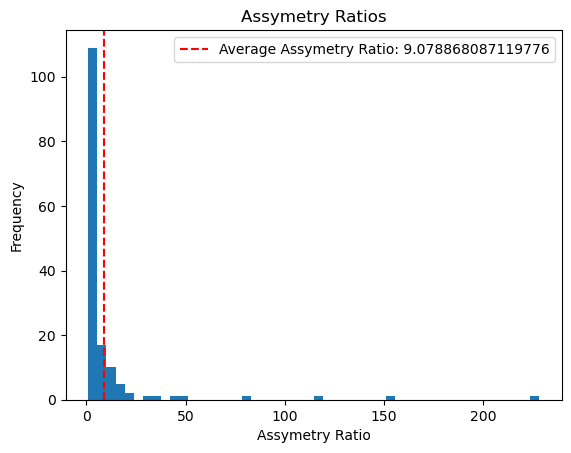

In [559]:
plt.hist(assymetry_ratios, bins=50)
plt.axvline(x=np.mean(assymetry_ratios), color='r', linestyle='--', label=f'Average Assymetry Ratio: {np.mean(assymetry_ratios)}')
plt.title('Assymetry Ratios')
plt.xlabel('Assymetry Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [560]:
#Zip trade_profits, positions,entry_betas, avg_beta_mismatch, assymetry_ratios, bigger_legs, S1_percentage_price_change_trade_ranges, S2_percentage_price_change_trade_ranges, trade_duration with labels

#print lengths of lists to ensure algined shapes



positions = [entry['position'] for entry in trade_entries]
trade_durations = [(exit_time - entry_time).total_seconds() / 60 for entry_time, exit_time in zip(entry_times, exit_times)]

print(f"Trade profits length: {len(trade_profits)}")
print(f"Positions: {len(positions)}")
print(f"Beta_entry: {len(entry_betas)}")
print(f"avg_beta_mismatchlength: {len(avg_beta_mismatch)}")
print(f"max_beta_mismatch: {len(max_beta_mismatch)}")
print(f"assymetry_ratios: {len(assymetry_ratios)}")
print(f"bigger_legs: {len(bigger_legs)}")
print(f"S1_percentage_changes: {len(S1_percentage_price_change_trade_ranges)}")
print(f"S2_percentage_changes: {len(S2_percentage_price_change_trade_ranges)}")
print(f"Trade duration (minutes): {len(trade_durations)}")



trade_data = list(zip(trade_profits, positions,entry_betas, avg_beta_mismatch,max_beta_mismatch, assymetry_ratios, bigger_legs, S1_percentage_price_change_trade_ranges, S2_percentage_price_change_trade_ranges, trade_durations))
trade_data = pd.DataFrame(trade_data, columns=['Trade Profit', 'Position','Entry Beta','Avg Beta Mismatch','Max Beta Mismatch','Assymetry Ratio', 'Bigger Leg', "Percentage Change S1", "Percentage Change S2", "Trade Duration (minutes)"])

#Add column for absolute percenrage profit return, and put it in the second column
trade_data.insert(1, 'Absolute Percentage Profit Return (%)', 0.0)
trade_data['Absolute Percentage Profit Return (%)'] = abs(trade_data['Trade Profit']) / initial_capital * 100

pd.set_option('display.max_columns', 160)
trade_data.head(150)


Trade profits length: 151
Positions: 151
Beta_entry: 151
avg_beta_mismatchlength: 151
max_beta_mismatch: 151
assymetry_ratios: 151
bigger_legs: 151
S1_percentage_changes: 151
S2_percentage_changes: 151
Trade duration (minutes): 151


,Trade Profit,Absolute Percentage Profit Return (%),Position,Entry Beta,Avg Beta Mismatch,Max Beta Mismatch,Assymetry Ratio,Bigger Leg,Percentage Change S1,Percentage Change S2,Trade Duration (minutes)
0,32.853480,0.328535,-1,0.332616,1.516808,17.167384,3.137187,S1,-0.379027,0.125351,378.0
1,-434.765502,4.347655,1,0.321947,2.126234,48.011387,3.616391,S1,-7.956394,-2.272566,113.0
2,69.884718,0.698847,1,0.323507,0.628057,4.676493,2.318341,S1,1.884760,0.892961,325.0
3,60.848587,0.608486,1,0.511889,0.617140,3.511889,1.689235,S2,0.354045,-0.641441,161.0
4,-20.266698,0.202667,1,0.302000,1.072412,7.698000,1.511663,S1,-0.754446,-0.555346,125.0
5,-144.463012,1.444630,-1,0.502453,2.224906,25.502453,13.853345,S2,0.125224,-1.970604,141.0
6,60.392965,0.603930,1,0.448725,0.449227,4.551275,1.084420,S2,0.433604,-0.513740,215.0
7,52.233439,0.522334,-1,0.603967,1.857688,41.396033,2.084981,S1,-0.597120,0.320817,326.0
8,29.321072,0.293211,-1,0.765723,0.720249,9.765723,1.645491,S2,0.827465,1.434045,540.0
9,24.961339,0.249613,-1,0.270050,0.749543,7.270050,4.937354,S1,-0.484262,-0.103884,162.0


In [561]:
#Remove big leg column from trade data
trade_data_no_big_leg = trade_data.drop(columns=['Bigger Leg'])

corr = trade_data_no_big_leg.corr()
print(corr['Absolute Percentage Profit Return (%)'].sort_values())

Trade Profit                            -0.346354
Entry Beta                              -0.142489
Trade Duration (minutes)                 0.010988
Percentage Change S2                     0.062689
Position                                 0.063203
Percentage Change S1                     0.140822
Assymetry Ratio                          0.170788
Avg Beta Mismatch                        0.465472
Max Beta Mismatch                        0.532843
Absolute Percentage Profit Return (%)    1.000000
Name: Absolute Percentage Profit Return (%), dtype: float64


Standard deviation of S1 returns: 0.0010263534123912965
Standard deviation of S2 returns: 0.001197882391205528
volatility_ratio: 0.8568064944659486


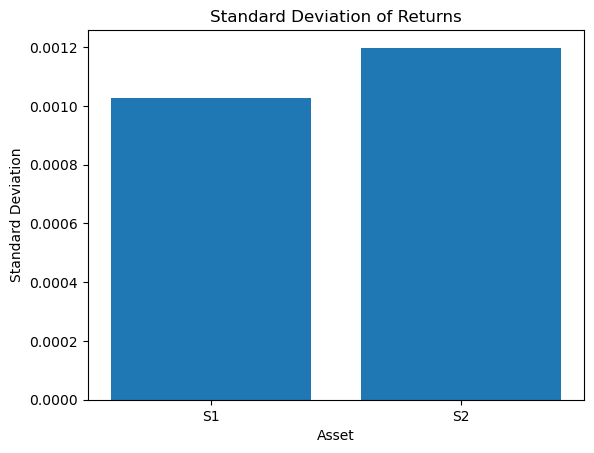

In [562]:
#Measure standard deviation of returns of S1 and S2

S1_returns = S1.pct_change().dropna()
S2_returns = S2.pct_change().dropna()
S1_std = S1_returns.std()
S2_std = S2_returns.std()
print(f"Standard deviation of S1 returns: {S1_std}")
print(f"Standard deviation of S2 returns: {S2_std}")

print(f"volatility_ratio: {S1_std/S2_std}")

#Plot differnce in volatility of S1 and S2 in a bar chart
plt.bar(['S1', 'S2'], [S1_std, S2_std])
plt.title('Standard Deviation of Returns')
plt.xlabel('Asset')
plt.ylabel('Standard Deviation')
plt.show()



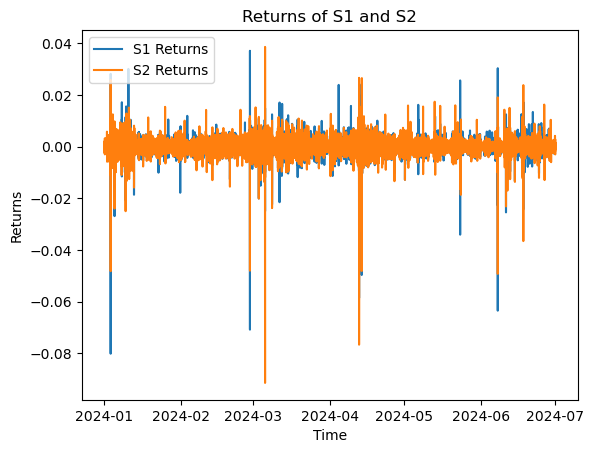

In [563]:
plt.plot(S1_returns, label='S1 Returns')
plt.plot(S2_returns, label='S2 Returns')
plt.legend(loc='upper left')
plt.title('Returns of S1 and S2')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()
#Plot the trade data

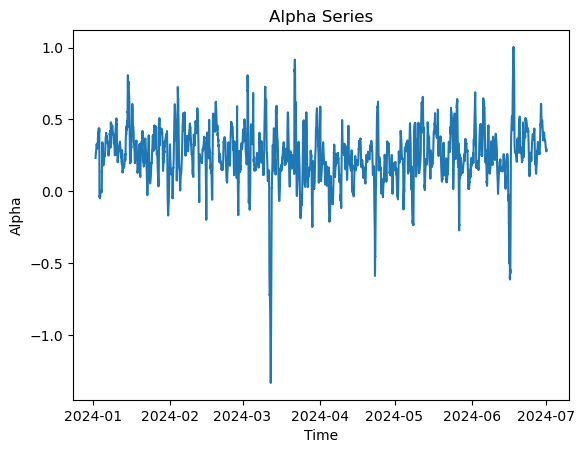

In [564]:
plt.plot(alpha_series)
plt.title('Alpha Series')
plt.xlabel('Time')
plt.ylabel('Alpha')
plt.show()


In [565]:
bigger_legs_S1 = [leg for leg in bigger_legs if leg == 'S1']
bigger_legs_S2 = [leg for leg in bigger_legs if leg == 'S2']
print(f"Number of trades with bigger leg S1: {len(bigger_legs_S1)}")
print(f"Number of trades with bigger leg S2: {len(bigger_legs_S2)}")

#Percentage of trades with bigger leg S1 and S2
percentage_bigger_leg_S1 = len(bigger_legs_S1) / len(bigger_legs) * 100
percentage_bigger_leg_S2 = len(bigger_legs_S2) / len(bigger_legs) * 100
print(f"Percentage of trades with bigger leg S1: {percentage_bigger_leg_S1}%")
print(f"Percentage of trades with bigger leg S2: {percentage_bigger_leg_S2}%")

Number of trades with bigger leg S1: 97
Number of trades with bigger leg S2: 54
Percentage of trades with bigger leg S1: 64.23841059602648%
Percentage of trades with bigger leg S2: 35.76158940397351%


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  2.,
         1.,  1.,  0.,  0.,  1.,  1.,  0.,  3.,  2.,  3.,  3.,  5., 12.,
         6., 10.,  7., 19.,  7., 11., 12.,  8.,  4.,  2.,  5.,  2.,  2.,
         2.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([-668.47078272, -658.2292139 , -647.98764508, -637.74607626,
        -627.50450745, -617.26293863, -607.02136981, -596.77980099,
        -586.53823217, -576.29666335, -566.05509453, -555.81352572,
        -545.5719569 , -535.33038808, -525.08881926, -514.84725044,
        -504.60568162, -494.36411281, -484.12254399, -473.88097517,
        -463.63940635, -453.39783753, -443.15626871, -432.91469989,
        -422.67313108, -41

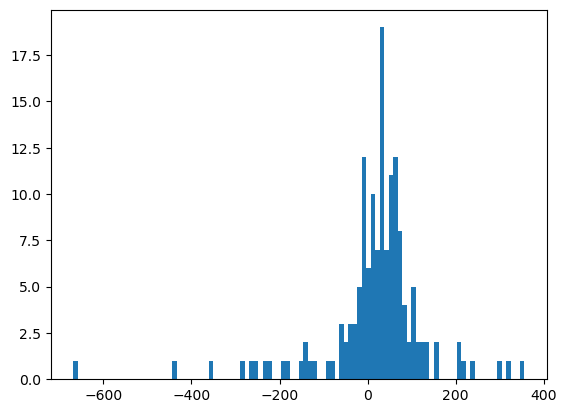

In [566]:
plt.hist(trade_profits, bins=100)

In [567]:
#Filter for negative values

trade_profits_neg = [x for x in trade_profits if x < 0]
print(f"Average trade loss:  € {np.mean(trade_profits_neg)}")

trade_profits_pos = [x for x in trade_profits if x > 0]
print(f"Average trade win:  € {np.mean(trade_profits_pos)}")

print("Number of negative profits(profits that were less than the transaction cost): ", len(trade_profits_neg))
print("Number of positive profits (profits that were greater than the transaction cost): ", len(trade_profits_pos))



Average trade loss:  € -98.16349240104533
Average trade win:  € 68.60866278304364
Number of negative profits(profits that were less than the transaction cost):  47
Number of positive profits (profits that were greater than the transaction cost):  104


In [568]:
#Get index of greatest loss
max_loss_index = trade_profits.index(min(trade_profits))
max_loss_index

58

In [569]:
trade_entries[max_loss_index]

{'time': Timestamp('2024-03-11 15:43:00'),
 'S1': 0.6351,
 'S2': 0.7441,
 'z': 3.921201946876976,
 'position': -1}

In [570]:
trade_exits[max_loss_index]

{'time': Timestamp('2024-03-11 19:43:00'),
 'S1': 0.7233,
 'S2': 0.7776,
 'z': -0.10267972071089952,
 'exit_type': 'win'}

In [571]:
print(f"MAX LOSS: {trade_profits[max_loss_index]}")

MAX LOSS: -668.4707827195738


In [572]:
#Get trade entry and exit times
trade_entry_min_profit = entry_times[max_loss_index],
trade_exit_min_profit = exit_times[max_loss_index]

print(f"Trade entry time: {trade_entry_min_profit}")
print(f"Trade exit time: {trade_exit_min_profit}")

Trade entry time: (Timestamp('2024-03-11 15:43:00'),)
Trade exit time: 2024-03-11 19:43:00


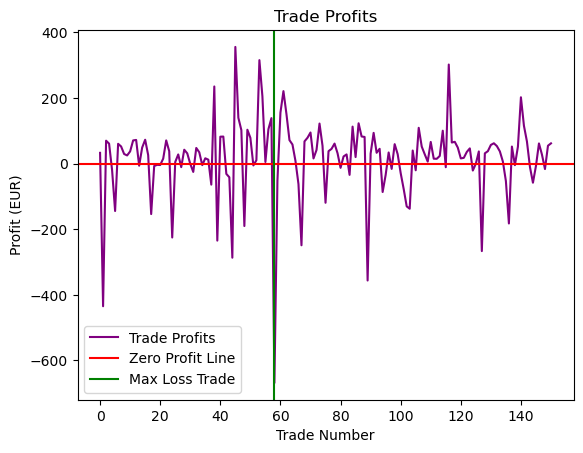

In [573]:
plt.plot(trade_profits, label='Trade Profits', color = 'purple')
plt.axhline(y=0, color='r', linestyle='-', label='Zero Profit Line')
plt.axvline(x=max_loss_index, color='g', linestyle='-', label='Max Loss Trade')
plt.title('Trade Profits')
plt.xlabel('Trade Number')
plt.ylabel('Profit (EUR)')
plt.legend()

Average trade duration: 330.75 minutes


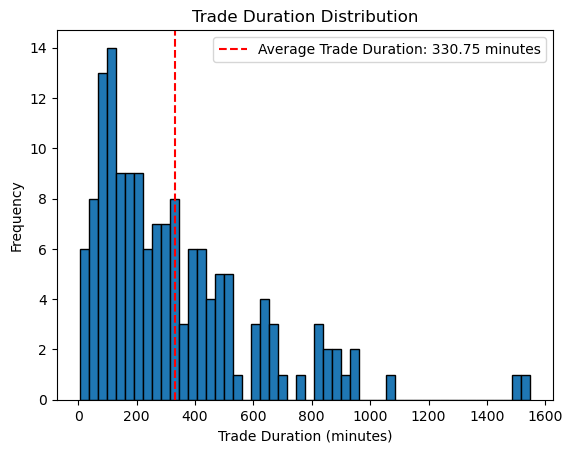

In [574]:
#Calculate the durations of all the trades
#trade_durations = [exit - entry for entry, exit in zip(entry_times, exit_times)]
trade_durations = [(exit_time - entry_time).total_seconds() / 60 for entry_time, exit_time in zip(entry_times, exit_times)]

average_trade_duration = np.mean(trade_durations)
print(f"Average trade duration: {average_trade_duration:.2f} minutes")
#Plot distribution of trade durations
plt.hist(trade_durations, bins=50, edgecolor='black')
plt.axvline(x=average_trade_duration, color='red', linestyle='--', label=f'Average Trade Duration: {average_trade_duration:.2f} minutes')
plt.xlabel('Trade Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Trade Duration Distribution')
plt.legend()
plt.show()

In [575]:
trade_durations[max_assymetry_index]

1549.0

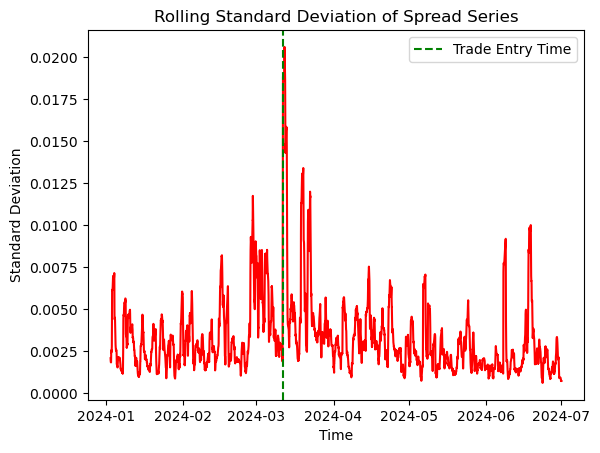

In [576]:
plt.plot(rolling_std, color = 'red')
plt.axvline(trade_entry_min_profit, color='green', linestyle='--', label='Trade Entry Time')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title('Rolling Standard Deviation of Spread Series')
plt.legend()


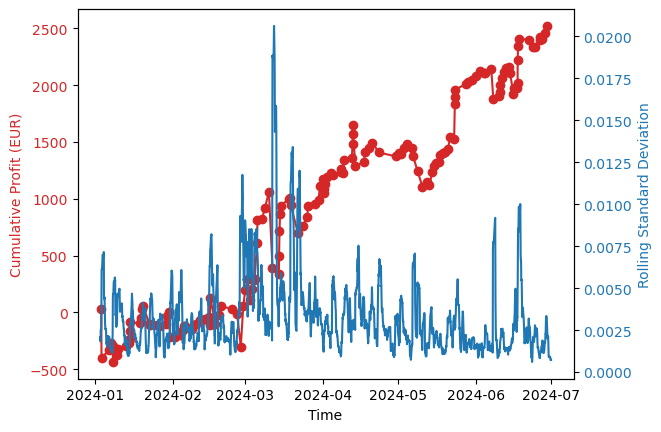

In [577]:
#Plot cumulative profit series and rolling standard deviation on same plot

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')      
ax1.set_ylabel('Cumulative Profit (EUR)', color=color)
ax1.plot(cumulative_profit_series, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Rolling Standard Deviation', color=color)
ax2.plot(rolling_std, color=color)
ax2.tick_params(axis='y', labelcolor=color) 


# Hypothesis: Big swings in returns are caused by over exposure to one side of the market due to entry using a "whipsawed Beta" + a big percentage price move over the trade
---

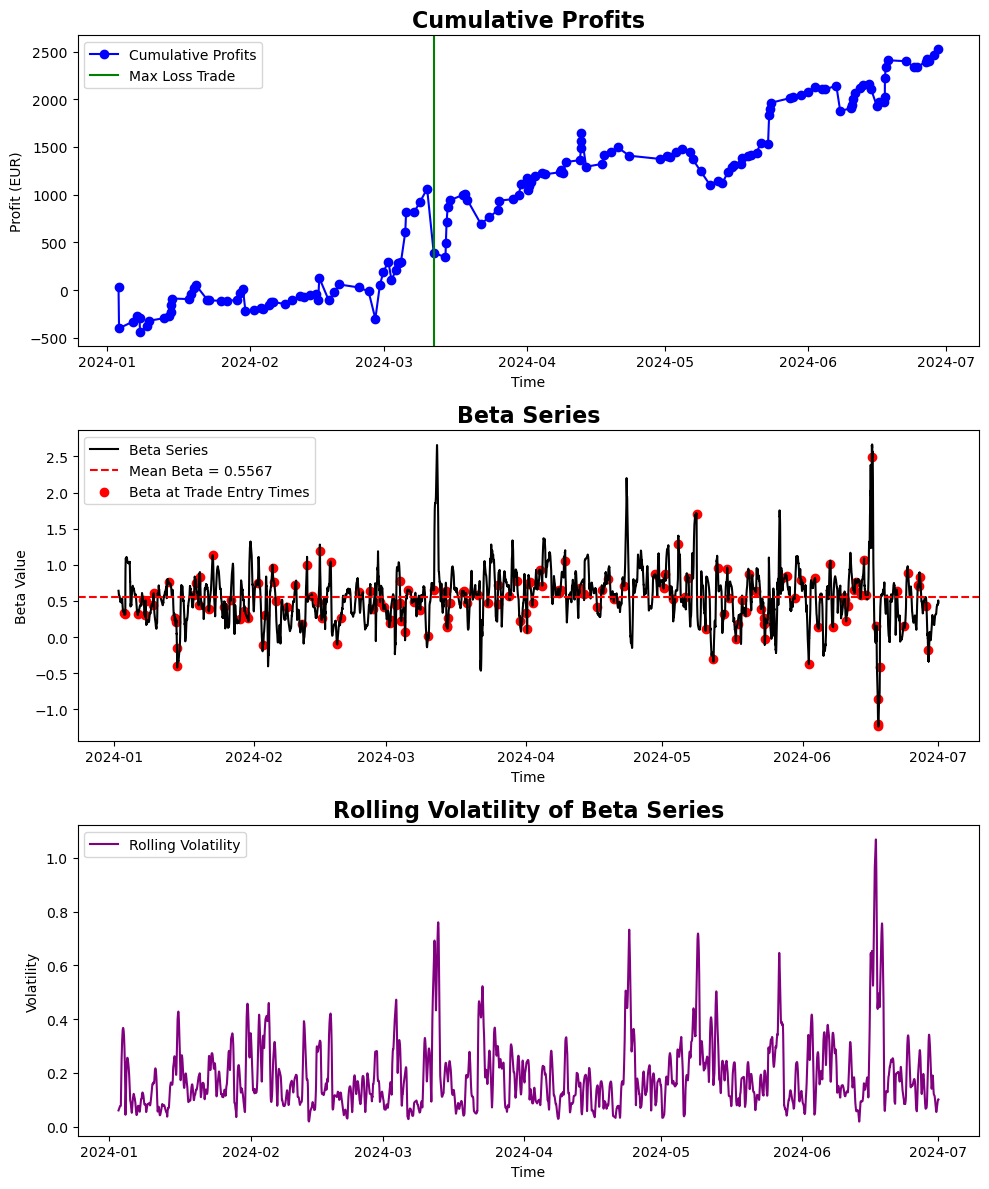

In [578]:
# Create a figure for stacked plots
plt.figure(figsize=(10, 12))

# First subplot: Cumulative Profits
plt.subplot(3, 1, 1)
plt.plot(cumulative_profit_series, label='Cumulative Profits', color='Blue', marker = 'o')
plt.axvline(x=trade_exit_min_profit, color='g', linestyle='-', label='Max Loss Trade')
plt.title('Cumulative Profits', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Profit (EUR)')
plt.legend()


# # First subplot: Trade Profits
# plt.subplot(4, 1, 2)
# plt.plot(trade_profits, label='Trade Profits', color='Green', marker='o')
# plt.title('Trade Profits', fontsize=16, fontweight='bold')
# plt.xlabel('Trade Number')
# plt.ylabel('Profit (EUR)')
# plt.legend()


# Second subplot: Beta Series with Mean Line
plt.subplot(3, 1, 2)
mean_beta = np.mean(beta_series)
plt.plot(beta_series, color='black', label='Beta Series')
plt.axhline(y=mean_beta, color='red', linestyle='--', label=f'Mean Beta = {mean_beta:.4f}')
plt.scatter(entry_times, [beta_series.loc[entry] for entry in entry_times], color='red', label='Beta at Trade Entry Times')
plt.title('Beta Series', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Beta Value')
plt.legend()

# Third subplot: Rolling Volatility of Beta Series
# Adjust the layout to 4 rows and 1 column
plt.subplot(3, 1, 3)
rolling_volatility = beta_series.rolling(window_size).std()
plt.plot(rolling_volatility, color='purple', label='Rolling Volatility')
plt.title('Rolling Volatility of Beta Series', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

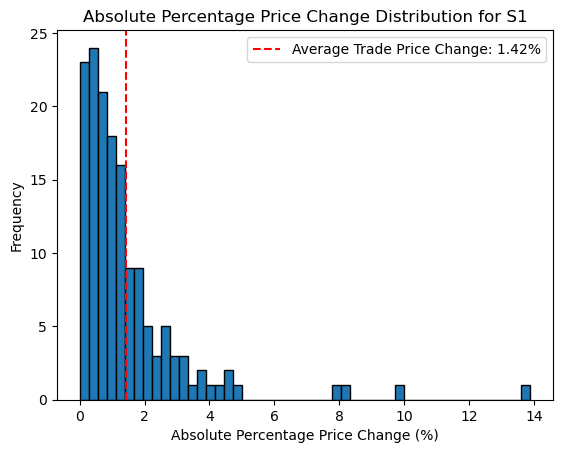

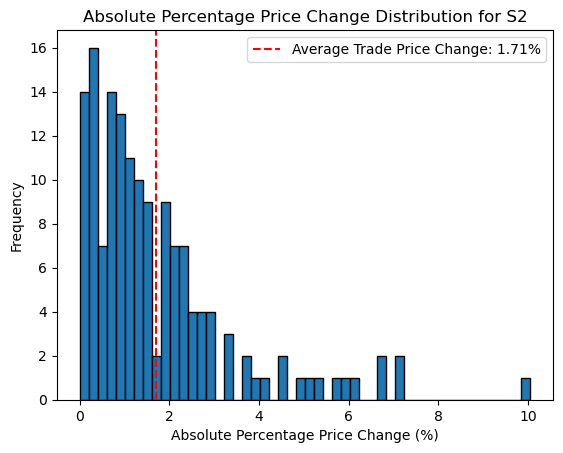

In [579]:

#Zip Beta at entries profits per trade and trade duration together 
beta_at_entries_profits = list(zip(beta_series.loc[entry_times], trade_profits, trade_durations))

#Calculate absolute percentage prrice change of S1 and S2 for each trade
abs_percentage_trade_price_change_S1 = [(abs(S1.loc[exit_time] - S1.loc[entry_time])/S1.loc[entry_time])*100  for entry_time, exit_time in zip(entry_times, exit_times)]
abs_percentage_trade_price_change_S2 = [(abs(S2.loc[exit_time] - S2.loc[entry_time])/S2.loc[entry_time])*100 for entry_time, exit_time in zip(entry_times, exit_times)]

#Distribution of absolute percentage price changes
plt.hist(abs_percentage_trade_price_change_S1, bins=50, edgecolor='black')
plt.axvline(x=np.mean(abs_percentage_trade_price_change_S1), color='red', linestyle='--', label=f'Average Trade Price Change: {np.mean(abs_percentage_trade_price_change_S1):.2f}%')
plt.xlabel('Absolute Percentage Price Change (%)')
plt.ylabel('Frequency')
plt.title('Absolute Percentage Price Change Distribution for S1')
plt.legend()
plt.show()

plt.hist(abs_percentage_trade_price_change_S2, bins=50, edgecolor='black')
plt.axvline(x=np.mean(abs_percentage_trade_price_change_S2), color='red', linestyle='--', label=f'Average Trade Price Change: {np.mean(abs_percentage_trade_price_change_S2):.2f}%')
plt.xlabel('Absolute Percentage Price Change (%)')
plt.ylabel('Frequency')
plt.title('Absolute Percentage Price Change Distribution for S2')
plt.legend()
plt.show()



In [580]:
#Check correlation between sign of trade profits and beta at entries
trade_profits_sign = [1 if profit > 0 else -1 for profit in trade_profits]

beta__entries_sign = [1 if beta > 0 else -1 for beta in beta_series.loc[entry_times]]


#Count the number of times where the the profit is negative for a negative beta and positive for a positive beta

count_neg_beta_neg_profit = sum(1 for profit, beta in zip(trade_profits_sign, beta__entries_sign) if profit == -1 and beta == -1)
count_pos_beta_pos_profit = sum(1 for profit, beta in zip(trade_profits_sign, beta__entries_sign) if profit == 1 and beta == 1)
count_neg_beta_pos_profit = sum(1 for profit, beta in zip(trade_profits_sign, beta__entries_sign) if profit == 1 and beta == -1)
count_pos_beta_neg_profit = sum(1 for profit, beta in zip(trade_profits_sign, beta__entries_sign) if profit == -1 and beta == 1)
print(f"Count of negative beta and negative profit: {count_neg_beta_neg_profit}")
print(f"Count of positive beta and positive profit: {count_pos_beta_pos_profit}")
print(f"Count of negative beta and positive profit: {count_neg_beta_pos_profit}")
print(f"Count of positive beta and negative profit: {count_pos_beta_neg_profit}")



Count of negative beta and negative profit: 0
Count of positive beta and positive profit: 91
Count of negative beta and positive profit: 13
Count of positive beta and negative profit: 47


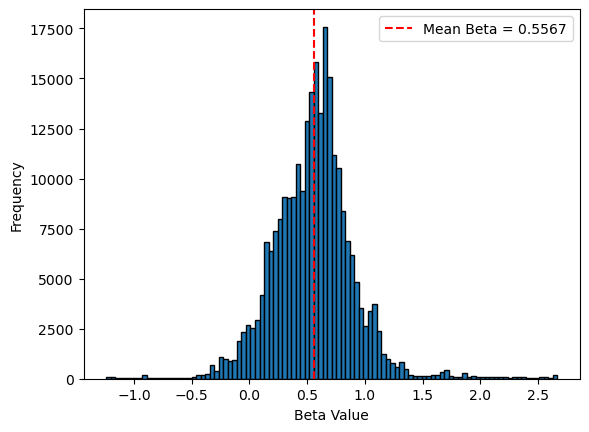

In [581]:
#Plot the distribution of beta series



plt.hist(beta_series, bins=100, edgecolor='black')
plt.axvline(x=np.mean(beta_series), color='red', linestyle='--', label=f'Mean Beta = {mean_beta:.4f}')
plt.xlabel('Beta Value')
plt.ylabel('Frequency')
plt.legend()

In [582]:
beta_series

timestamp
2024-01-01 00:00:00         NaN
2024-01-01 00:01:00         NaN
2024-01-01 00:02:00         NaN
2024-01-01 00:03:00         NaN
2024-01-01 00:04:00         NaN
                         ...   
2024-06-30 23:55:00    0.475751
2024-06-30 23:56:00    0.475358
2024-06-30 23:57:00    0.474984
2024-06-30 23:58:00    0.474679
2024-06-30 23:59:00    0.474260
Length: 262080, dtype: float64

# Relationship between returns volatility and Beta volatility
---

In [583]:
from scipy import stats


trade_ranges = [(entry, exit) for entry, exit in zip(entry_times, exit_times)]

#Get beta series in the trade ranges
beta_series_trade_ranges = [beta_series[entry:exit] for entry, exit in trade_ranges]

#Calcullate the volatility of the beta series in the trade ranges
volatility_trade_ranges = [np.std(beta_series_trade_range) for beta_series_trade_range in beta_series_trade_ranges]

#Calculate range of the beta series in the trade ranges
abs_beta_trade_ranges = [np.abs(np.max(beta_series_trade_range) - np.min(beta_series_trade_range)) for beta_series_trade_range in beta_series_trade_ranges]

#Calculate the absolute returns for each trade
absolute_trade_returns = [np.abs(trade_profit/initial_capital) for trade_profit in trade_profits]

#-------------------------------------------


# #Perform linear regression to determine if there is a relationship between absolute returns and volatility
# slope, intercept, r_value, p_value, std_err = stats.linregress(volatility_trade_ranges, absolute_trade_returns)
# print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R-squared: {r_value**2:.4f}, P-value: {p_value:.4f}, Standard Error: {std_err:.4f}")

# if p_value < 0.05:
#     print("There is a significant relationship between absolute returns and volatility")
# else:
#     print("There is no significant relationship between absolute returns and volatility")

# #Plot the relationship between absolute returns and volatility with a linear regression line
# plt.scatter(volatility_trade_ranges, absolute_trade_returns)
# plt.plot(volatility_trade_ranges, [slope*volatility_val + intercept for volatility_val in volatility_trade_ranges], color='red', label='Linear Regression')
# plt.xlabel('Beta Volatility')
# plt.ylabel('Absolute Returns')
# plt.title('Absolute Returns vs Volatility')
# plt.legend()
# plt.show()

#-------------------------------------------



Text(0.5, 1.0, 'Absolute Returns vs Beta Range')

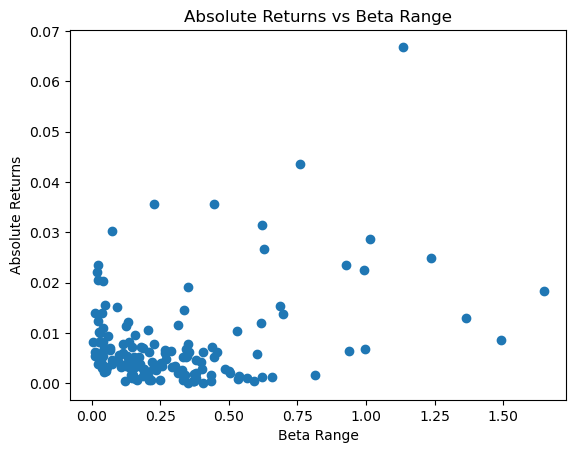

In [584]:
#Plot absolute_trade_returns vs abs_beta_trade_ranges
plt.scatter(abs_beta_trade_ranges, absolute_trade_returns)
plt.xlabel('Beta Range')
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns vs Beta Range')

# Delta Neutrality 
---

Slope: 0.0199
Intercept: 0.0047
R-squared: 0.1135
P-value: 0.0000


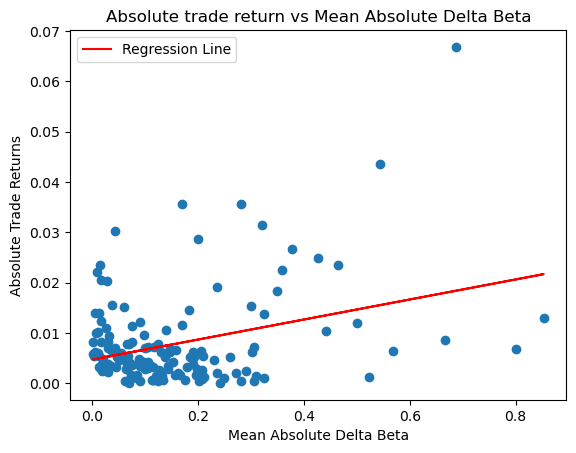

In [585]:
#Plot trade profits vs absolute delta neutrality

from scipy import stats

#Get actual Betas used for each trade entry
beta_entries = [beta_series[entry] for entry in entry_times]

trade_ranges = [(entry, exit) for entry, exit in zip(entry_times, exit_times)]

#Get beta series in the trade ranges

beta_series_trade_ranges = [beta_series[entry:exit].iloc[1:] for entry, exit in trade_ranges] #iloc[1:] to exclude the first beta value which is the same as the entry beta

#Calculate the absolute difference between the beta at the trade entry and the betas in the trade range
absolute_delta_betas = [np.abs(entry_beta - beta_range) for entry_beta, beta_range in zip(beta_entries, beta_series_trade_ranges)]

#Calculate the mean delta beta for each trade
mean_absolute_delta_betas = [np.mean(delta) for delta in absolute_delta_betas]


absolute_trade_returns = [np.abs(trade_profit/initial_capital) for trade_profit in trade_profits]

#Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
slope, intercept, r_value, p_value, std_err = stats.linregress(mean_absolute_delta_betas, absolute_trade_returns)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

#Plot trade profits vs absolute delta neutrality and the regression line

plt.plot(mean_absolute_delta_betas, absolute_trade_returns, 'o',)
plt.plot(mean_absolute_delta_betas, intercept + slope*np.array(mean_absolute_delta_betas), 'r', label='Regression Line')
plt.xlabel('Mean Absolute Delta Beta')
plt.ylabel('Absolute Trade Returns')
plt.title('Absolute trade return vs Mean Absolute Delta Beta')
plt.legend()


Slope: 0.0110
Intercept: 0.0048
R-squared: 0.1189
P-value: 0.0000


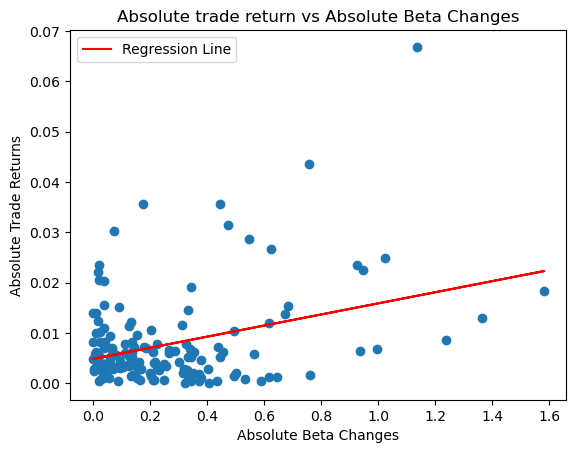

In [586]:
#Get entry beta for each trade
entry_betas = [beta_series[entry] for entry in entry_times]

#Get exit beta for each trade
exit_betas = [beta_series[exit] for exit in exit_times]

#Calculate the absolute difference between the entry and exit betas
absolute_beta_changes = [np.abs(exit - entry) for entry, exit in zip(entry_betas, exit_betas)]

#Regression analysis to determine if there is a relationship between beta changes and absolute trade returns

slope, intercept, r_value, p_value, std_err = stats.linregress(absolute_beta_changes, absolute_trade_returns)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

#Plot trade profits vs absolute beta changes and the regression line

plt.plot(absolute_beta_changes, absolute_trade_returns, 'o',)
plt.plot(absolute_beta_changes, intercept + slope*np.array(absolute_beta_changes), 'r', label='Regression Line')
plt.xlabel('Absolute Beta Changes')
plt.ylabel('Absolute Trade Returns')
plt.title('Absolute trade return vs Absolute Beta Changes')
plt.legend()

In [587]:
len(absolute_beta_changes)

151

In [588]:
#Get entry and exit betas for each trade
entry_betas = [beta_series[entry] for entry in entry_times]
exit_betas = [beta_series[exit] for exit in exit_times]

#Calculate the absolute difference between the entry and exit betas
absolute_beta_changes = [np.abs(exit - entry) for entry, exit in zip(entry_betas, exit_betas)]



In [589]:
# # Create a figure for stacked plots
# plt.figure(figsize=(10, 12))

# # First subplot: Cumulative Profits
# plt.subplot(3, 1, 1)
# plt.plot(absolute_trade_returns, color='Blue')
# plt.title('Absolute trade returns', fontsize=16, fontweight='bold')
# plt.xlabel('Time')
# plt.ylabel('Absolute trade return')
# plt.legend()

# #Second subplot: Mean Absolute Delta Beta
# plt.subplot(3, 1, 2)
# plt.plot(mean_absolute_delta_betas, color='red')
# plt.title('Mean Absolute Delta Beta', fontsize=16, fontweight='bold')
# plt.xlabel('Time')
# plt.ylabel('Mean Absolute Delta Beta')
# plt.legend()

# #Third subplot: Absolute Beta Changes
# plt.subplot(3, 1, 3)
# plt.plot(absolute_beta_changes, color='green')
# plt.title('Absolute Beta Changes', fontsize=16, fontweight='bold')
# plt.xlabel('Time')
# plt.ylabel('Absolute Beta Changes')
# plt.legend()



# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

Slope: 0.0002
Intercept: 0.1016
R-squared: 0.0856
P-value: 0.0003
There is a significant relationship between trade durations and mean absolute delta beta


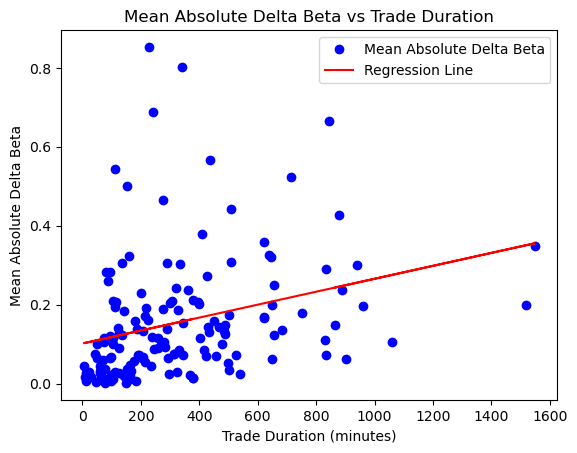

In [590]:
#Plot mean_absolute_delta_betas against trade durations with a regression line

#Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
slope, intercept, r_value, p_value, std_err = stats.linregress(trade_durations, mean_absolute_delta_betas)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant relationship between trade durations and mean absolute delta beta")
else:
    print("There is no significant relationship between trade durations and mean absolute delta beta")


#Plot trade profits vs absolute delta neutrality and the regression line
plt.plot(trade_durations, mean_absolute_delta_betas, 'o', label='Mean Absolute Delta Beta', color='blue')
plt.plot(trade_durations, intercept + slope*np.array(trade_durations), 'r', label='Regression Line')
plt.xlabel('Trade Duration (minutes)')
plt.ylabel('Mean Absolute Delta Beta')
plt.title('Mean Absolute Delta Beta vs Trade Duration')
plt.legend()
plt.show()


In [591]:
len(mean_absolute_delta_betas)

151

In [592]:
#Plot distributions of beta_series_trade_ranges in multiple subplots



In [593]:
len(beta_series_trade_ranges)

151

In [594]:
# #Calculate rolling standard deviation of S1 and S2
# rolling_std_S1 = S1.rolling(window=window_size).std()
# rolling_std_S2 = S2.rolling(window=window_size).std()

# #Plot the rolling standard deviation of S1 and S2 on separate plots

# plt.plot(rolling_std_S1, color='blue')
# plt.xlabel('Time')
# plt.ylabel('Standard Deviation')
# plt.title(f'Rolling Standard Deviation of {sym1}')




In [595]:
# plt.plot(rolling_std_S2, color='green')
# plt.xlabel('Time')
# plt.ylabel('Standard Deviation')
# plt.title(f'Rolling Standard Deviation of {sym2}')

In [596]:
#Get index of negative trade profits
negative_trade_profits_indeices = [i for i, x in enumerate(trade_profits) if x < 0]

#Get the corresponding trade entry and exit times
negative_trade_entry_times = [entry_times[i] for i in negative_trade_profits_indeices]
negative_trade_exit_times = [exit_times[i] for i in negative_trade_profits_indeices]


In [597]:
trade_exit_min_profit

Timestamp('2024-03-11 19:43:00')

In [598]:
#Plot trading simulation

# window_start = pd.to_datetime('2024-03-01 00:00:00')
# window_end = pd.to_datetime('2024-03-25 00:00:00')

#Window for biggest loss
window_start = pd.to_datetime(trade_entry_min_profit[0])
window_end = pd.to_datetime(trade_exit_min_profit)

# window_start = pd.to_datetime('2024-06-17 16:00:00')
# window_end = pd.to_datetime('2024-06-17 16:50:00')


# window_start = None
# window_end = None

#NOTE THAT THE TIMES ON THE X AXIS SHOW THE HOURS AND MINUTES

# S1 = S1_mid_price
# S2 = S2_mid_price

plot_trading_simulation(
    S1, 
    S2, 
    sym1, 
    sym2, 
    zscore_series, 
    positions, 
    trade_profits,
    entry_threshold,
    stop_loss_threshold,
    trade_entries=trade_entries,  # list of dicts: { 'time', 'S1', 'S2', 'z', 'position' }
    trade_exits=trade_exits,    # list of dicts: { 'time', 'S1', 'S2', 'z', 'exit_type' }
    window_start=window_start,
    window_end=window_end
)



AttributeError: 'list' object has no attribute 'loc'

In [115]:
trade_exits

[{'time': Timestamp('2024-01-03 14:36:00'),
  'S1': 0.02638,
  'S2': 0.1822,
  'z': 0.4437793572055555,
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-04 18:33:00'),
  'S1': 0.02781,
  'S2': 0.1931,
  'z': -0.006850665086796985,
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-05 12:46:00'),
  'S1': 0.02661,
  'S2': 0.1854,
  'z': 0.015488705301360182,
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-06 23:04:00'),
  'S1': 0.02594,
  'S2': 0.1703,
  'z': -0.02746432362962432,
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-07 04:17:00'),
  'S1': 0.0266,
  'S2': 0.1732,
  'z': -0.04384630080231934,
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-08 04:01:00'),
  'S1': 0.02312,
  'S2': 0.1528,
  'z': 0.017604863748637723,
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-10 08:41:00'),
  'S1': 0.02449,
  'S2': 0.1591,
  'z': 0.022223017237155054,
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-10 11:15:00'),
  'S1': 0.02548,
  'S2': 0.1655,
  'z': 0.5195951685157

In [116]:
#Check slippage

#Get timestampe of trade entries and exits
entry_times = [x['time'] for x in trade_entries]
exit_times = [x['time'] for x in trade_exits]

#Get the actual entry and exit prices of the two assets at the time of trade entries and exits
S1_actual_entry_prices = [x['S1'] for x in trade_entries]
S2_actual_entry_prices = [x['S2'] for x in trade_entries]

S1_actual_exit_prices = [x['S1'] for x in trade_exits]
S2_actual_exit_prices = [x['S2'] for x in trade_exits]

#Get the mid prices of the two assets at the time of trade entries and exits
S1_entry_mid_prices = S1_mid_price.loc[entry_times]
S2_entry_mid_prices = S2_mid_price.loc[entry_times]

S1_exit_mid_prices = S1_mid_price.loc[exit_times]
S2_exit_mid_prices = S2_mid_price.loc[exit_times]

#Get the slippage for the two assets
S1_entry_slippage_percentage = (S1_actual_entry_prices - S1_entry_mid_prices) / S1_entry_mid_prices * 100
S2_entry_slippage_percentage = (S2_actual_entry_prices - S2_entry_mid_prices) / S2_entry_mid_prices * 100

S1_exit_slippage_percentage = (S1_actual_exit_prices - S1_exit_mid_prices) / S1_exit_mid_prices * 100
S2_exit_slippage_percentage = (S2_actual_exit_prices - S2_exit_mid_prices) / S2_exit_mid_prices * 100


NameError: name 'S1_mid_price' is not defined

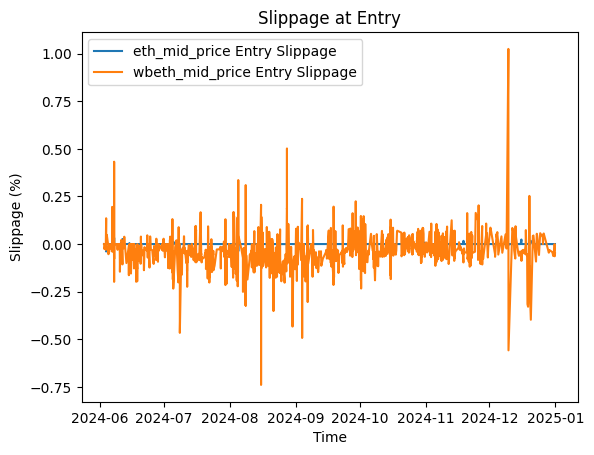

In [ ]:

#Create plots for slippage

plt.plot(S1_entry_slippage_percentage, label=f'{sym1} Entry Slippage')
plt.plot(S2_entry_slippage_percentage, label=f'{sym2} Entry Slippage')
plt.xlabel('Time')
plt.ylabel('Slippage (%)')
plt.title('Slippage at Entry')
plt.legend(loc='upper left')
plt.show()


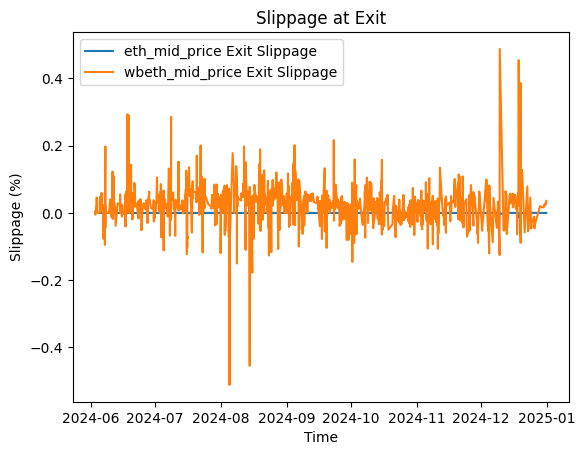

In [ ]:
plt.plot(S1_exit_slippage_percentage, label= f'{sym1} Exit Slippage')
plt.plot(S2_exit_slippage_percentage, label= f'{sym2} Exit Slippage')
plt.xlabel('Time')
plt.ylabel('Slippage (%)')
plt.title('Slippage at Exit')
plt.legend(loc='upper left')
plt.show()

In [42]:
#Print average S1 price change percent rounded to 2 decimal places

#Average Absolute Percentage Reversion
#---------------------------------------


In [43]:

def calculate_avg_abs_pct_reversion(trade_entries, trade_exits):
    """
    Calculate the average absolute percentage reversion from trade entry to trade exit
    for both asset price series (S1 and S2), using the interpolated trade data.
    
    Args:
        trade_entries (list): List of dictionaries for trade entries.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'position'
        trade_exits (list): List of dictionaries for trade exits.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'exit_type'
    
    Returns:
        overall_avg (float): The average of the average absolute percentage changes for S1 and S2.
    """
    S1_pct_changes = []
    S2_pct_changes = []
    
    # Loop over paired trade entries and exits.
    for entry, exit in zip(trade_entries, trade_exits):
        entry_S1 = entry['S1']
        entry_S2 = entry['S2']
        exit_S1 = exit['S1']
        exit_S2 = exit['S2']
        
        # Calculate absolute percentage change for each asset.
        pct_change_S1 = np.abs((exit_S1 - entry_S1) / entry_S1 * 100)
        pct_change_S2 = np.abs((exit_S2 - entry_S2) / entry_S2 * 100)
        
        S1_pct_changes.append(pct_change_S1)
        S2_pct_changes.append(pct_change_S2)
    
    # Compute the average absolute percentage change for S1 and S2.
    avg_abs_S1 = np.mean(S1_pct_changes) if S1_pct_changes else 0
    avg_abs_S2 = np.mean(S2_pct_changes) if S2_pct_changes else 0
    
    # Overall average is the average of the two.
    overall_avg = (avg_abs_S1 + avg_abs_S2) / 2
    
    print(f"Average absolute S1 price change percent: {avg_abs_S1:.2f}%")
    print(f"Average absolute S2 price change percent: {avg_abs_S2:.2f}%")
    print(f"Average of average absolute price changes: {overall_avg:.2f}%")
    
    return overall_avg



In [44]:
overall_avg_reversion = calculate_avg_abs_pct_reversion(trade_entries, trade_exits)

Average absolute S1 price change percent: 0.21%
Average absolute S2 price change percent: 0.22%
Average of average absolute price changes: 0.21%
